In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import signal
from scipy.fftpack import fft, fftshift

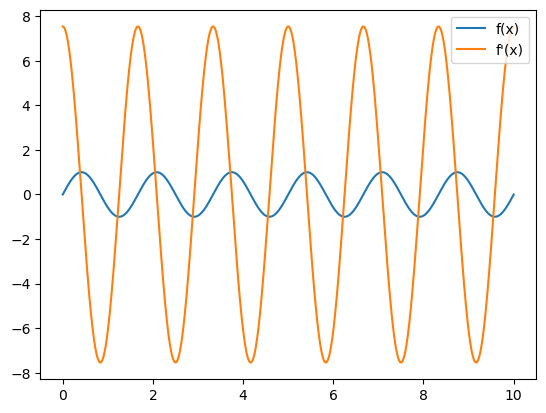

In [4]:
%matplotlib inline
def triangle(x, A, freq):
    wavelength = 1 / freq
    loc = x % wavelength
    if loc >= 0 and loc < wavelength / 4:
        return 4 * A * loc
    elif loc >= wavelength / 4 and loc < (3 * wavelength) / 4:
        return 2 * A - (4 * A * loc)
    elif loc >  (3 * wavelength) / 4:
        return -4 * A + 4 * A * loc

def d_triangle(x, A, freq):
    wavelength = 1 / freq
    loc = x % wavelength
    return 4 * A if 0 <= loc < 0.25 or 0.75 <= loc else -4 * A
    
def triangle_range(x_lim, A, freq):
    triang_vals = []
    for x in x_lim:
        triang_vals.append(A * triangle(freq * x, 1, 1))
    return np.array(triang_vals)

def d_triangle_range(x_lim, A, freq):
    d_triang = []
    for x in x_lim:
        d_triang.append(A * d_triangle(freq * x, 1, 1))
    return np.array(d_triang)
    
x_lim = np.linspace(0, 10, 1000)
plt.plot(x_lim, np.sin(w * x_lim * np.pi), label='f(x)')
plt.plot(x_lim, 2 * w * np.pi * np.cos(w * x_lim * np.pi), label='f\'(x)')
plt.legend()



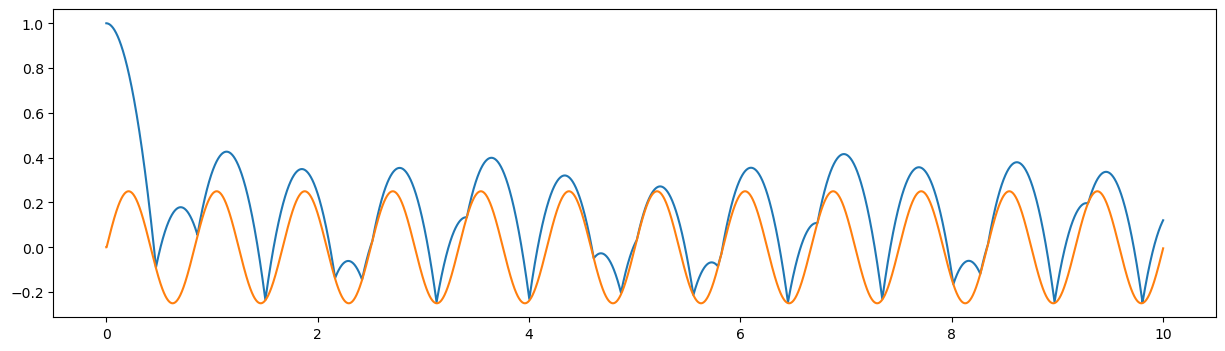

In [3]:
# %matplotlib qt
%matplotlib inline

t_max = 10
dt = 0.0025
g = 9.81
x_i = 1

e = 0.8 # coefficient of restitution

A = 0.25 # table oscillation amplitude
w = 1.2 # table oscillation frequency

t = 0
time_array = [0]
ball_pos = [x_i]
ball_vel = [0]
floor_pos = [0]
peaks = []

counter = 0 # counter for peak finding
while t < t_max:
    # instantaneous velocity of the floor
    floor_vel = A * 2 * w * np.pi * np.cos(w * t * 2 * np.pi)
    
    # checking for collision
    if ball_pos[-1] + ball_vel[-1] * dt < floor_pos[-1] + floor_vel * dt: 
        # find the max height in the trajectory from the previous collision to current impact
        peaks.append(np.max(ball_pos[-counter:]))
        counter = 0
        if ball_vel[-1] > 0:
            ball_vel.append((ball_vel[-1] - g * dt + floor_vel) * e)        
        elif ball_vel[-1] < 0:
            ball_vel.append((-ball_vel[-1] - g * dt + floor_vel) * e)
    else: 
        ball_vel.append(ball_vel[-1] - g * dt)
    
    # updating the position of the floor
    floor_pos.append(A * np.sin(w * t * 2 * np.pi))
        
    ball_pos.append(ball_pos[-1] + ball_vel[-1] * dt)
    t += dt
    counter += 1
    time_array.append(t)

plt.figure(figsize=(15, 4))
plt.plot(time_array, ball_pos)
plt.plot(time_array, floor_pos)

# print(peaks)

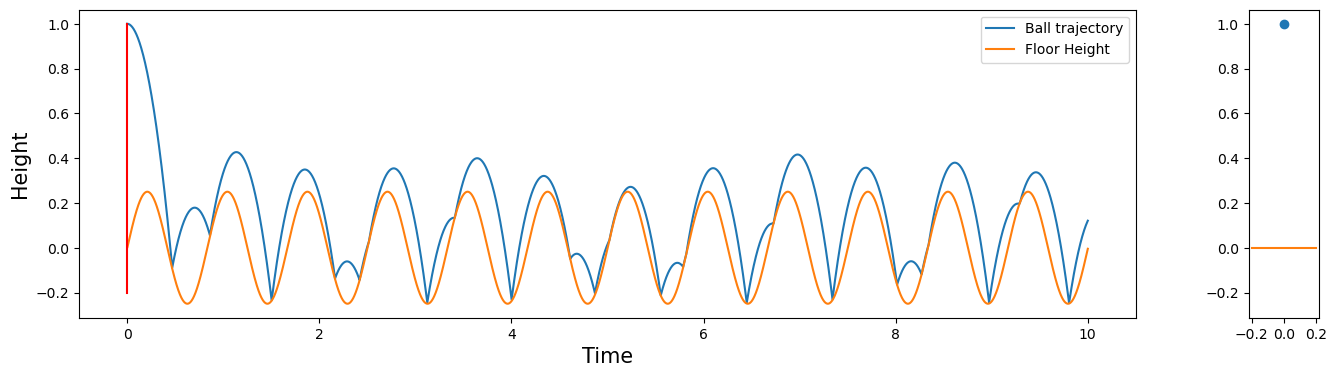

In [5]:
plt.close()
fig, ax = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [15, 1]})
speed = 10
to_plot = np.arange(0, t_max / dt + speed, speed, dtype=int)

def update(n):
    ax[0].clear()
    ax[1].clear()
    i = n
    t = i * dt
    ax[0].plot(time_array, ball_pos, label='Ball trajectory', color='C0')
    ax[0].plot(time_array, floor_pos, label='Floor Height', color='C1')
    ax[0].plot([t, t], [-0.2, 1], color='r')
    ax[0].legend()
    ax[0].set_xlabel('Time', size=15)
    ax[0].set_ylabel('Height', size=15)
    
    ax[1].plot([0], [ball_pos[i]], marker='o', color='C0')
    ax[1].plot([-0.2, 0.2], [floor_pos[i], floor_pos[i]], color='C1')
    ax[1].set_ylim(ax[0].get_ylim())
    
    print(f'generating frame {i / 10} / {t_max / dt}', end='\r')
    
ani = animation.FuncAnimation(fig, update, frames=to_plot, blit=False, interval=20)

ani.save('hugging.gif', writer='pillow')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4001,) + inhomogeneous part.

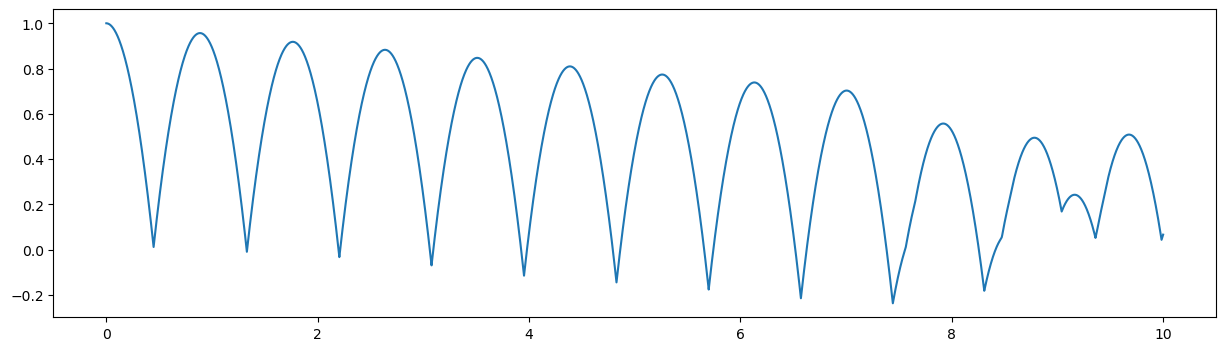

In [15]:
# %matplotlib qt
%matplotlib inline

t_max = 10
dt = 0.0025
g = 9.81
x_i = 1

e = 0.8 # coefficient of restitution

A = 0.25 # table oscillation amplitude
w = 2.25 # table oscillation frequency

t = 0
time_array = [0]
ball_pos = [x_i]
ball_vel = [0]
floor_pos = [0]
peaks = []

counter = 0 # counter for peak finding
while t < t_max:
    # instantaneous velocity of the floor
    floor_vel = d_triangle_range([t], A, w)
    
    # checking for collision
    if ball_pos[-1] + ball_vel[-1] * dt < floor_pos[-1] + floor_vel * dt: 
        # find the max height in the trajectory from the previous collision to current impact
        peaks.append(np.max(ball_pos[-counter:]))
        counter = 0
        if ball_vel[-1] > 0:
            ball_vel.append((ball_vel[-1] - g * dt + floor_vel) * e)        
        elif ball_vel[-1] < 0:
            ball_vel.append((-ball_vel[-1] - g * dt + floor_vel) * e)
    else: 
        ball_vel.append(ball_vel[-1] - g * dt)
    
    # updating the position of the floor
    floor_pos.append(triangle_range([t], A, w))
        
    ball_pos.append(ball_pos[-1] + ball_vel[-1] * dt)
    t += dt
    counter += 1
    time_array.append(t)

ball_pos_new = []
floor_pos_new = []
for i in ball_pos:
    try:
        ball_pos_new.append(i[0])
    except:
        ball_pos_new.append(i)
        
for i in floor_pos:
    try:
        floor_pos_new.append(i[0])
    except:
        floor_pos_new.append(i)
        
plt.figure(figsize=(15, 4))
plt.plot(time_array, ball_pos_new)
plt.plot(time_array, floor_pos)

# print(peaks)

C:\Users\sagel\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


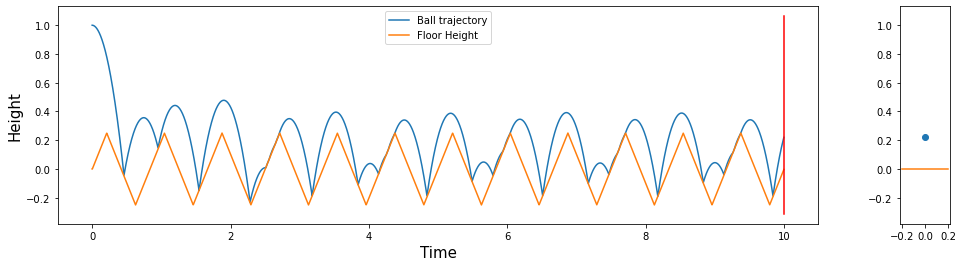

In [49]:
plt.close()
fig, ax = plt.subplots(1, 2, figsize=(16, 4), gridspec_kw={'width_ratios': [15, 1]})
speed = 10
to_plot = np.arange(0, t_max / dt + speed, speed, dtype=int)

def update(n):
    ax[0].clear()
    ax[1].clear()
    i = n
    t = i * dt
    ax[0].plot(time_array, ball_pos, label='Ball trajectory', color='C0')
    ax[0].plot(time_array, floor_pos, label='Floor Height', color='C1')
    ylower, yupper = ax[0].get_ylim()
    ax[0].plot([t, t], [ylower, yupper], color='r')
    ax[0].legend()
    ax[0].set_xlabel('Time', size=15)
    ax[0].set_ylabel('Height', size=15)
    
    ax[1].plot([0], [ball_pos[i]], marker='o', color='C0')
    ax[1].plot([-0.2, 0.2], [floor_pos[i], floor_pos[i]], color='C1')
    ax[1].set_ylim(ax[0].get_ylim())
    
    print(f'generating frame {i / 10} / {t_max / dt}', end='\r')
    
ani = animation.FuncAnimation(fig, update, frames=to_plot, blit=False, interval=20)

ani.save('test.gif', writer='pillow')

In [37]:
t_max = 100
dt = 0.01
g = 9.81
x_i = 1

e = 0.8 # coefficient of restitution

A = 0.25 # table oscillation amplitude

resolution = 0.002
omegas = np.arange(1, 4 + resolution, resolution)

all_peaks = []
for w in omegas:
    print(f'Now computing: omega = {w:.4f}', end='\r')
    t = 0
    time_array = [0]
    ball_pos = [x_i]
    ball_vel = [0]
    floor_pos = [0]
    peaks = []

    counter = 0 # counter for peak finding
    while t < t_max:
        # instantaneous velocity of the floor
        floor_vel = d_triangle_range([t], A, w)

        # checking for collision
        if ball_pos[-1] + ball_vel[-1] * dt < floor_pos[-1] + floor_vel * dt: 
            
            if t > 75:
                # find the max height in the trajectory from the previous collision to current impact
                peaks.append(np.max(ball_pos[-counter:]))
                counter = 0
            
            if ball_vel[-1] > 0:
                ball_vel.append((ball_vel[-1] - g * dt + floor_vel) * e)        
            elif ball_vel[-1] < 0:
                ball_vel.append((-ball_vel[-1] - g * dt + floor_vel) * e)
        else: 
            ball_vel.append(ball_vel[-1] - g * dt)

        # updating the position of the floor
        floor_pos.append(triangle_range([t], A, w))

        ball_pos.append(ball_pos[-1] + ball_vel[-1] * dt)
        t += dt
        counter += 1
        time_array.append(t)
    
    all_peaks.append(peaks)
print('Done')

C:\Users\sagel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Donecomputing: omega = 4.0000


Text(0.5, 1.0, 'Table Frequency vs. Peak Height Bifrucation Diagram')

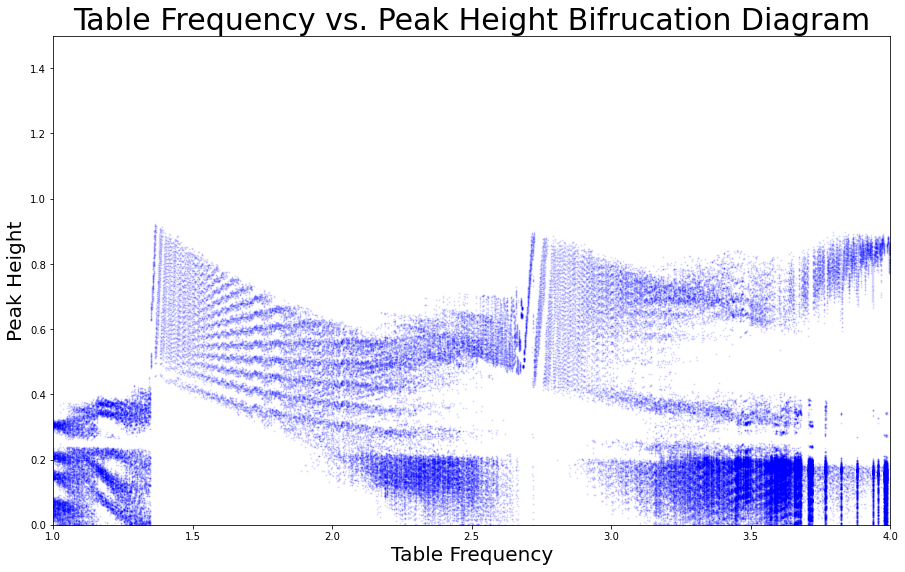

In [39]:
%matplotlib inline
plt.close()
plt.figure(figsize=(15, 9))
for i, peaks in enumerate(all_peaks):
    plt.scatter(omegas[i] * np.ones(len(peaks) - 1), peaks[1:], marker='o', color='b', alpha=0.1, s = 1)
    
plt.xlim(1, 4)
plt.ylim(0, 1.5)
plt.xlabel('Table Frequency', size=20)
plt.ylabel('Peak Height', size=20)
plt.title('Table Frequency vs. Peak Height Bifrucation Diagram', size=30)